In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import joblib

# Reading the dataset

In [2]:
data = pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

# Data Preprocessing

In [4]:
#checking for null values in the dataset
data.isnull().sum()

Unnamed: 0                          0
cut                                 0
color                               0
clarity                             0
carat_weight                        0
cut_quality                         0
lab                                 0
symmetry                            0
polish                              0
eye_clean                           0
culet_size                          0
culet_condition                     0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                          0
girdle_max                          0
fluor_color                         0
fluor_intensity                143491
fancy_color_dominant_color          0
fancy_color_secondary_color         0
fancy_color_overtone             1650
fancy_color_intensity               0
total_sales_price                   0
dtype: int64

In [5]:
data = data.drop(columns='Unnamed: 0')

In [6]:
data.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [7]:
data.nunique()

cut                               11
color                             11
clarity                           11
carat_weight                     878
cut_quality                        6
lab                                3
symmetry                           5
polish                             5
eye_clean                          5
culet_size                         9
culet_condition                    4
depth_percent                    534
table_percent                    235
meas_length                     1415
meas_width                      1155
meas_depth                       852
girdle_min                        10
girdle_max                        10
fluor_color                        6
fluor_intensity                    7
fancy_color_dominant_color        13
fancy_color_secondary_color       11
fancy_color_overtone               8
fancy_color_intensity             10
total_sales_price              22202
dtype: int64

In [8]:
#Deleting any duplicated rows

data[data.duplicated()]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
111,Round,L,I2,0.31,Very Good,GIA,Very Good,Very Good,unknown,unknown,...,2.75,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,274
238,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,326
240,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,326
241,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,326
276,Round,F,VVS2,0.14,Excellent,IGI,Excellent,Excellent,unknown,unknown,...,0.00,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219494,Radiant,unknown,VS1,15.95,unknown,GIA,Good,Very Good,unknown,unknown,...,8.57,M,STK,unknown,Faint,Yellow,unknown,NaN,Fancy,378829
219506,Radiant,G,VS2,9.05,unknown,GIA,Very Good,Very Good,Yes,N,...,7.55,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,385128
219542,Emerald,K,VS2,15.14,unknown,GIA,Very Good,Excellent,Yes,N,...,7.78,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,420529
219551,Princess,G,VS2,9.05,unknown,GIA,Very Good,Very Good,Yes,N,...,7.55,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,431217


In [9]:
data = data.drop_duplicates()

In [10]:
data[data.duplicated()]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price


In [11]:
# Changing categorical values by encoding using Label encoder
from sklearn.preprocessing import LabelEncoder

In [12]:
lnc = LabelEncoder()
df = data.copy()
for i in data:
    r = data[i].dtypes
    if r == 'object':
        df[i] = lnc.fit_transform(data[i])
        joblib.dump(lnc,i+'.joblib',compress=9)

In [13]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215823 entries, 0 to 219702
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          215823 non-null  int32  
 1   color                        215823 non-null  int32  
 2   clarity                      215823 non-null  int32  
 3   carat_weight                 215823 non-null  float64
 4   cut_quality                  215823 non-null  int32  
 5   lab                          215823 non-null  int32  
 6   symmetry                     215823 non-null  int32  
 7   polish                       215823 non-null  int32  
 8   eye_clean                    215823 non-null  int32  
 9   culet_size                   215823 non-null  int32  
 10  culet_condition              215823 non-null  int32  
 11  depth_percent                215823 non-null  float64
 12  table_percent                215823 non-null  float64
 13  meas

# Outlier detection

c:\Users\walea\miniconda3\envs\diamond\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


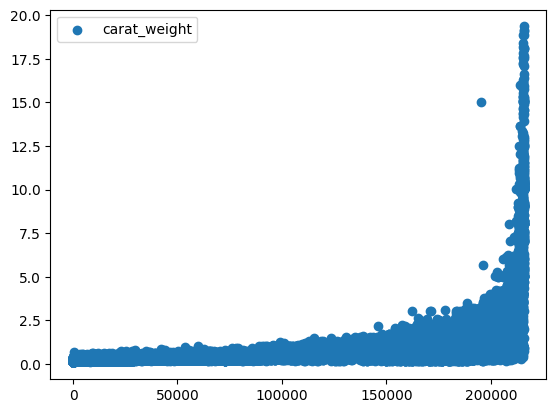

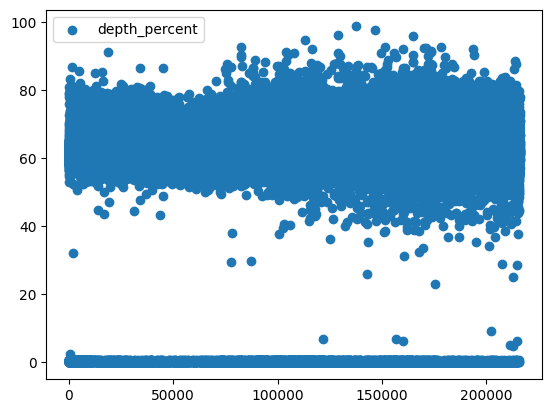

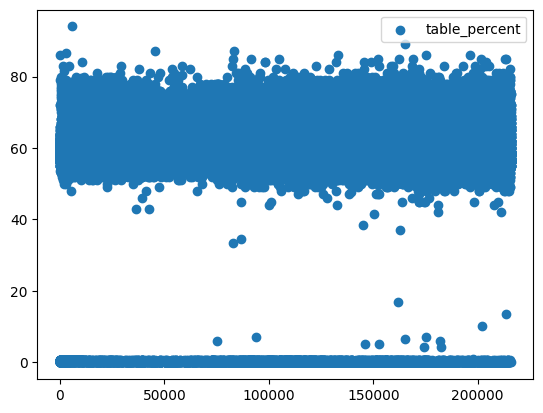

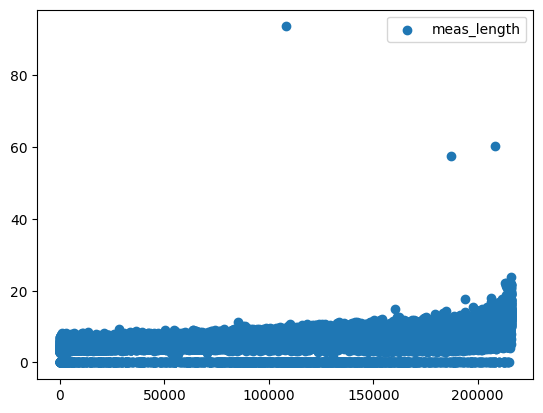

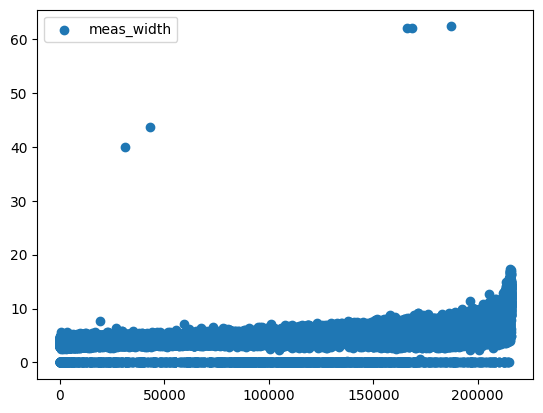

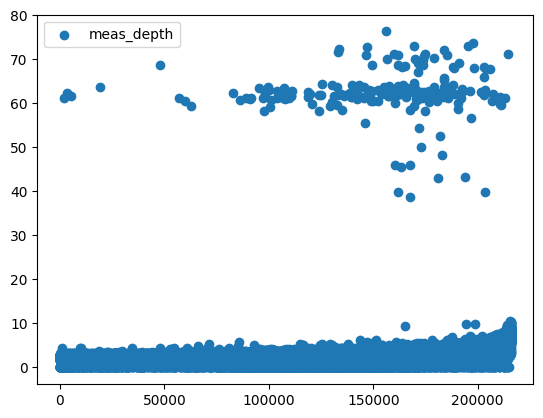

In [14]:
#we are gonna use plotting to understand the dataset

for i in df:
    r = df[i].dtypes
    if r == 'float64':
        plt.scatter(range(len(df[i])), df[i],label=i)
        plt.legend()
        plt.show()

In [15]:

df = df[(df.meas_length < 40)]
df = df[(df.meas_width < 30)]
df = df[(df.meas_depth < 30)]


In [16]:
#checking if measured parameters are 0 or not

df[(df.meas_width == 0) | (df.meas_depth == 0) | (df.meas_length == 0) | (df.depth_percent == 0) | (df.table_percent == 0)]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
24,10,8,0,0.34,0,2,0,0,4,8,...,0.00,9,9,5,7,12,10,7,9,204
25,10,2,9,0.09,0,2,4,4,4,8,...,0.00,9,9,5,7,12,10,7,9,204
26,10,1,9,0.09,4,2,4,4,4,8,...,0.00,9,9,5,4,12,10,7,9,204
44,10,0,7,0.11,0,2,4,0,4,8,...,0.00,9,9,5,7,12,10,7,9,222
45,10,1,7,0.11,0,2,4,4,4,8,...,0.00,9,9,5,7,12,10,7,9,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218830,10,1,4,5.07,0,0,0,4,4,3,...,0.00,9,9,0,1,12,10,7,9,160984
219389,7,10,10,15.52,5,0,4,0,4,8,...,6.34,1,3,5,7,11,1,7,3,302640
219415,10,2,7,6.28,0,0,0,0,4,3,...,7.24,4,4,5,7,12,10,7,9,320733
219530,7,4,7,11.95,5,1,4,0,4,8,...,7.76,1,1,5,1,12,10,7,9,408347


In [17]:
#since it is not substantial we can remove this and store in a different DF to check for model accuracy
df2 = df.copy()
df2 = df2[(df2.meas_width != 0)]
df2 = df2[(df2.meas_depth != 0)] 
df2 = df2[(df2.meas_length != 0)]
df2 = df2[(df2.depth_percent != 0) ]
df2 = df2[(df2.table_percent != 0)]

print(df.shape)
print(df2.shape)

(215599, 25)
(210513, 25)


# Feature selection and Data splitting

<Axes: >

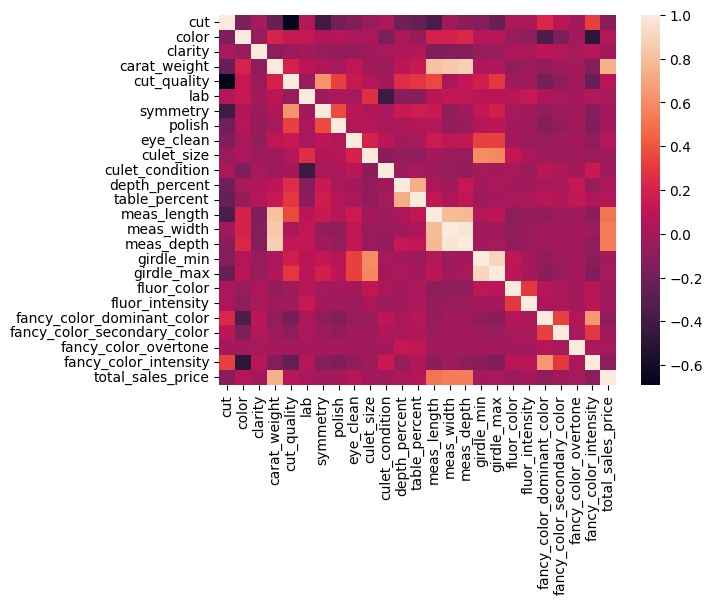

In [18]:
#lets do a quantitative analysis by feature correlation

from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = MinMaxScaler()
# done to normalize inputs 


corr = df2.corr()
sns.heatmap(corr)

In [19]:
#lets first define all features 
features = []
for i in df2:
    if i != 'total_sales_price':
        features.append(i)
print(features)

['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']


In [20]:
X = df2[features]
y = df2['total_sales_price']

print(X.shape)
print(y.shape)
'''
#miniX = np.min(X)
#maxiX = np.max(X)
miniy = np.min(y)
maxiy = np.max(y)
#print(miniX)
print(maxiX)
#X = (X-miniX)/(maxiX - miniX)
y = (y-miniy)/(maxiy - miniy)
'''
#X = ss.fit_transform(X)
#y = ss.fit_transform(y.values.reshape(-1,1))
print(X.shape)
print(y.shape)

(210513, 24)
(210513,)
(210513, 24)
(210513,)


In [21]:
#using f_regression score we can slect k best features
from sklearn.feature_selection import SelectKBest as skb
from sklearn.feature_selection import f_regression

#first we analyze all scores

fs = skb(f_regression,k='all')
fs.fit(X,y)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' %(i,fs.scores_[i]))
    

Feature 0: 2350.245825
Feature 1: 762.745835
Feature 2: 7.404681
Feature 3: 262560.922842
Feature 4: 1256.060366
Feature 5: 51.814592
Feature 6: 15.197575
Feature 7: 0.755202
Feature 8: 699.842038
Feature 9: 61.599192
Feature 10: 93.900701
Feature 11: 178.097669
Feature 12: 796.564783
Feature 13: 73702.352007
Feature 14: 87254.214321
Feature 15: 87641.854961
Feature 16: 0.246595
Feature 17: 9.204295
Feature 18: 191.829958
Feature 19: 1.741475
Feature 20: 1217.865325
Feature 21: 114.291335
Feature 22: 6.850899
Feature 23: 1492.602215


In [22]:
#now we select 15 best features out of 24 and get their names

fs = skb(f_regression, k = 15)
Xnew = fs.fit_transform(X,y)
f = np.array(features)
filt = fs.get_support()
f = f[filt]
print(f,len(f))


['cut' 'color' 'carat_weight' 'cut_quality' 'eye_clean' 'culet_condition'
 'depth_percent' 'table_percent' 'meas_length' 'meas_width' 'meas_depth'
 'fluor_color' 'fancy_color_dominant_color' 'fancy_color_secondary_color'
 'fancy_color_intensity'] 15


In [23]:
Xnew = X
y = y.values.reshape(-1,1)
print(Xnew.shape)
print(y.shape)

(210513, 24)
(210513, 1)


In [24]:
#final check
print(Xnew,Xnew.shape)
print(y,y.shape)


        cut  color  clarity  carat_weight  cut_quality  lab  symmetry  polish  \
0        10      1       10          0.09            0    2         4       4   
1        10      1       10          0.09            4    2         4       4   
2        10      1       10          0.09            0    2         4       4   
3        10      1       10          0.09            0    2         4       4   
4        10      1       10          0.09            4    2         4       0   
...     ...    ...      ...           ...          ...  ...       ...     ...   
219698   10      1        7         10.65            0    0         0       0   
219699    9     10        8          5.17            5    0         4       4   
219700   10      1        7         18.07            0    0         0       0   
219701    8     10        5          0.90            5    0         2       2   
219702    7     10       10         10.03            5    0         4       0   

        eye_clean  culet_si

In [25]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(Xnew, y, test_size = 0.2, random_state = 40)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(168410, 24) (168410, 1)
(42103, 24) (42103, 1)


# Modelling the regression

In [26]:
#for this we can use the inbuilt LinearRegression model in sklearn
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

mlr.fit(X_train, y_train)

print("Intercept: ",mlr.intercept_)
print("Coeffs: ", list(zip(X, mlr.coef_)))




Intercept:  [47853.41838876]
Coeffs:  [('cut', array([ 6.64106881e+02, -7.55473976e+02,  2.74657930e+02,  3.94633273e+04,
       -3.30389126e+01, -2.32512024e+03,  5.34062542e+01,  4.83886747e+00,
        4.22876510e+02,  4.63440504e+00, -3.05057033e+03,  2.72438705e+02,
       -3.43603064e+02, -3.01793630e+03,  4.08656979e+03, -1.86438677e+04,
        1.53578546e+01,  2.41573621e+00,  6.11352442e+01,  5.75474647e+01,
       -2.07327782e+03,  8.15065750e+01,  1.91558061e+03,  1.36076593e+02]))]


In [27]:
y_pred_mlr = mlr.predict(X_test)

In [28]:
#metrics

from sklearn import metrics

MABE = metrics.mean_absolute_error(y_test, y_pred_mlr)
r2 = mlr.score(X_test,y_test)*100

print("R squared score: ",r2)
print("Mean absolute error: ",MABE)

R squared score:  64.33548379262656
Mean absolute error:  4020.1009103603733


# Model number 2: ANN

In [29]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [30]:
model = Sequential()
model.add(Dense(units = 100, input_dim = 24, kernel_initializer = 'normal', activation='relu'))
model.add(Dense(units = 50, kernel_initializer = 'normal', activation='relu'))
model.add(Dense(1, kernel_initializer = 'normal'))

#Since it is a curve fitting problem loss is MSE
#Lets add a history to track the loss
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train,y_train, validation_split = 0.2, batch_size = 2000, epochs = 50, verbose = 1 )





c:\Users\walea\miniconda3\envs\diamond\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 759480192.0000 - val_loss: 688993664.0000
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 716837248.0000 - val_loss: 652502208.0000
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 813794880.0000 - val_loss: 640621248.0000
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 707288256.0000 - val_loss: 638582272.0000
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 660877056.0000 - val_loss: 635960512.0000
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 674626880.0000 - val_loss: 632055936.0000
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 660512704.0000 - val_loss: 626026112.0000
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 619393536.0000 - val_loss: 615611712.0000
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 693513728.0000 - val_loss: 597421440.0000
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 620447616.0000 - val_loss: 56926508

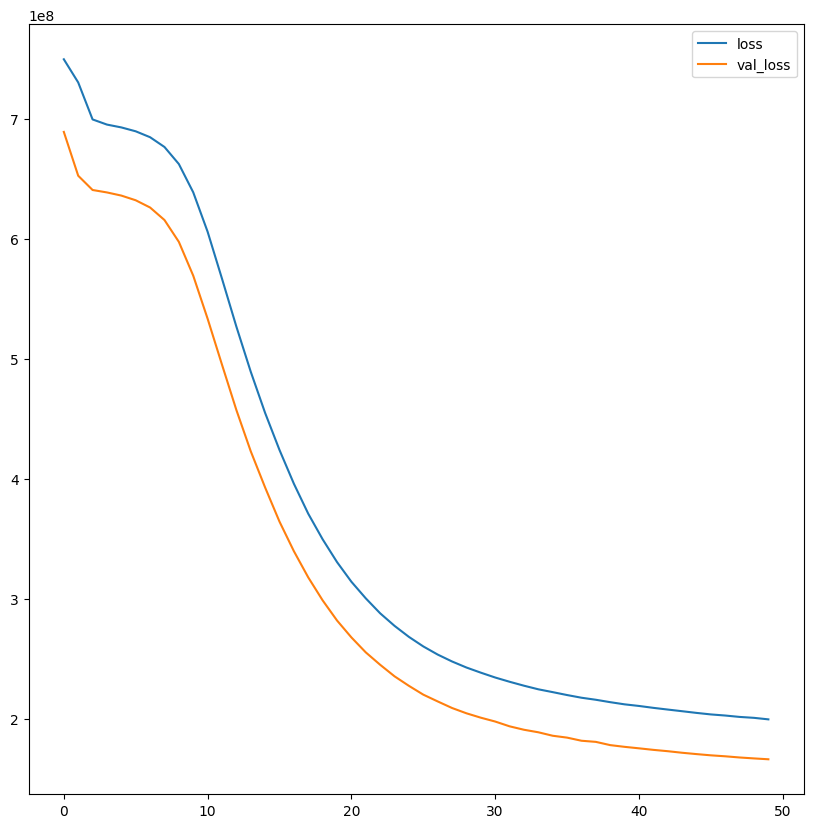

In [31]:
#plotting loss curve
'''
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()
'''

pd.DataFrame(history.history).plot(figsize = (10,10))
plt.show()

In [32]:
#predictions

pred = model.predict(X_test)
#pred_denorm = pred*(maxiy-miniy) + miniy
#y_test_denorm = y_test*(maxiy-miniy) + miniy


from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)*100

print("R Squared: ",r2)

1316/1316 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
R Squared:  73.82270097732544


[1983.5281]
[1684]


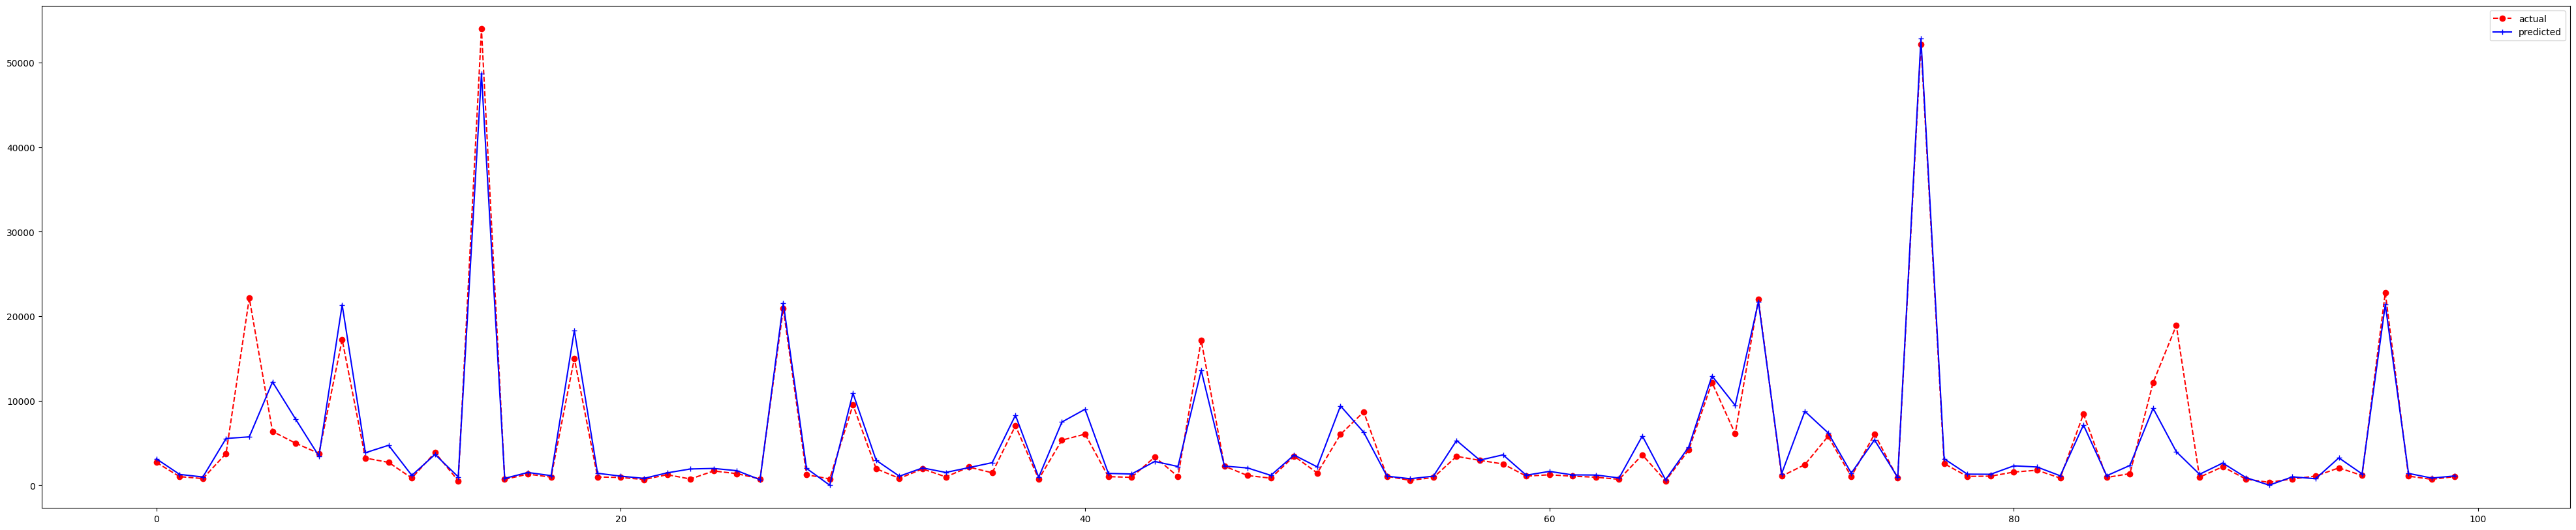

In [33]:
#plotting the fit

print(pred[5024])
print(y_test[5024])
plt.figure(figsize=(50,10))
plt.plot(y_test[5000:5100],'ro--',label='actual')
plt.plot(pred[5000:5100], 'b+-', label='predicted')
plt.legend()
plt.show()

# Saving Model

In [34]:
model.save('tf_m_1.0.0.h5')